In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import talib as talib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from backtesting import Strategy, Backtest
from backtesting.lib import crossover
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
# Creating DataFrame using Yahoo Finance
asset = str(input('Look on Yahho Finance for ticker.'
                  'Asset to backtest: '))
df = yf.download(asset, start='1990-01-01')


[*********************100%***********************]  1 of 1 completed


In [4]:
df = df.reset_index()

In [5]:
df.set_index('Date', inplace=True)

In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440
...,...,...,...,...,...,...
2022-03-13,0.790567,0.819025,0.783251,0.790995,0.790995,772035954
2022-03-14,0.790412,0.812075,0.781908,0.803917,0.803917,924771999
2022-03-15,0.803841,0.815622,0.785917,0.800006,0.800006,832137304


In [7]:
class SMACross(Strategy):
    n1 = 10
    n2 = 20
    
    def init(self):
        self.sma1 = self.I(talib.SMA, self.data.Close, self.n1)
        self.sma2 = self.I(talib.SMA, self.data.Close, self.n2)
        
    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.position.close()

In [8]:
bt = Backtest(df, SMACross, cash=10000, commission=0.04, exclusive_orders=True)
output= bt.run()
print(output)
bt.plot()

Start                     2017-11-09 00:00:00
End                       2022-03-17 00:00:00
Duration                   1589 days 00:00:00
Exposure Time [%]                   48.867925
Equity Final [$]                 70285.822706
Equity Peak [$]                 227709.394587
Return [%]                         602.858227
Buy & Hold Return [%]             2525.583107
Return (Ann.) [%]                   56.461231
Volatility (Ann.) [%]              150.320628
Sharpe Ratio                         0.375605
Sortino Ratio                        1.141825
Calmar Ratio                         0.664216
Max. Drawdown [%]                  -85.004386
Avg. Drawdown [%]                  -21.292718
Max. Drawdown Duration      797 days 00:00:00
Avg. Drawdown Duration       67 days 00:00:00
# Trades                                   36
Win Rate [%]                        33.333333
Best Trade [%]                     567.613511
Worst Trade [%]                    -29.757394
Avg. Trade [%]                    

Row(id='1449', ...)

/usr/bin/sensible-browser: 8: /mnt/c/Program: not found
[22651:22694:0317/125921.068196:ERROR:bus.cc(397)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[22651:22694:0317/125921.068801:ERROR:bus.cc(397)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[22651:22693:0317/125921.096997:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[22651:22693:0317/125921.097063:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[22651:22693:0317/125921.167516:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[22651:22693:0317/125921.167566:ERROR:bus

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/backtesting/backtesting.py:1488: UserWarning: Searching for best of 710 configurations.
  output = _optimize_grid()


Backtest.optimize:   0%|          | 0/13 [00:00<?, ?it/s]

Start                     2017-11-09 00:00:00
End                       2022-03-17 00:00:00
Duration                   1589 days 00:00:00
Exposure Time [%]                   41.509434
Equity Final [$]                387522.864413
Equity Peak [$]                 519175.010014
Return [%]                        3775.228644
Buy & Hold Return [%]             2525.583107
Return (Ann.) [%]                  131.530994
Volatility (Ann.) [%]              213.009275
Sharpe Ratio                          0.61749
Sortino Ratio                        2.949777
Calmar Ratio                         2.720813
Max. Drawdown [%]                  -48.342533
Avg. Drawdown [%]                  -17.371076
Max. Drawdown Duration      335 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                    7
Win Rate [%]                        57.142857
Best Trade [%]                    1194.901342
Worst Trade [%]                    -33.430873
Avg. Trade [%]                    

/usr/bin/sensible-browser: 8: /mnt/c/Program: not found


<AxesSubplot:xlabel='n2', ylabel='n1'>

[23034:23071:0317/125939.115515:ERROR:bus.cc(397)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[23034:23071:0317/125939.115667:ERROR:bus.cc(397)] Failed to connect to the bus: Failed to connect to socket /var/run/dbus/system_bus_socket: No such file or directory
[23034:23070:0317/125939.121683:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[23034:23070:0317/125939.121772:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[23034:23070:0317/125939.136603:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse server address: Unknown address type (examples of valid types are "tcp" and on UNIX "unix")
[23034:23070:0317/125939.136684:ERROR:bus.cc(397)] Failed to connect to the bus: Could not parse 

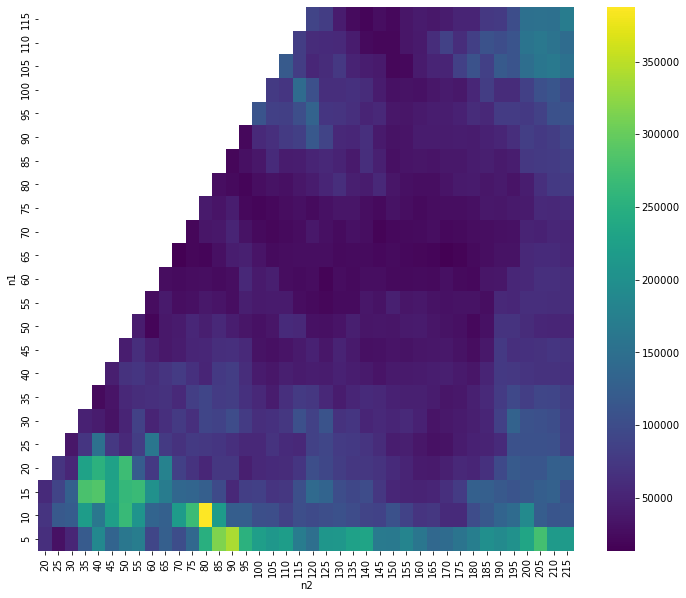

[23077:23077:0317/125941.558512:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[23034:23063:0317/125945.516375:ERROR:chrome_browser_main_extra_parts_metrics.cc(227)] START: ReportBluetoothAvailability(). If you don't see the END: message, this is crbug.com/1216328.
[23034:23063:0317/125945.516936:ERROR:chrome_browser_main_extra_parts_metrics.cc(230)] END: ReportBluetoothAvailability()
[23077:23077:0317/130347.211054:ERROR:shared_image_manager.cc(226)] SharedImageManager::ProduceSkia: Trying to Produce a Skia representation from a non-existent mailbox.
[23077:23077:0317/130347.658535:ERROR:shared_image_manager.cc(226)] SharedImageManager::ProduceSkia: Trying to Produce a Skia representation from a non-existent mailbox.
[23077:23077:0317/130347.916534:ERROR:shared_image_manager.cc(226)] SharedImageManager::ProduceSkia: Trying to Produce a Skia representation from a non-existent mailbox.
[23077:23077:0317/130347.922409:ERROR:shared_im

In [9]:
# Optimization process
stats, heatmap = bt.optimize(
    n1=range(5,120,5),
    n2=range(20,220,5),
    maximize='Equity Final [$]',
    constraint=lambda x: x.n1 < x.n2,
    return_heatmap=True
)

print(stats)
print(stats._strategy)
bt.plot()
print(heatmap.sort_values(ascending=False).iloc[:10])
hm = heatmap.groupby(['n1','n2']).mean().unstack()
plt.figure(figsize=(12,10))
sns.heatmap(hm[::-1], cmap='viridis')
# plt.savefig('sma-crossover-heatmap.png')